# Zero-Shot Classification Evaluation

This notebook evaluates the results of the zero-shot classification model. It calculates accuracy, generates a classification report, and visualizes the confusion matrix and confidence distributions.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 1. Load Data

In [10]:
csv_path = 'Results/aggregated_results.csv'
df = pd.read_csv(csv_path)
print(f"Loaded {len(df)} rows.")
df.head()

Loaded 3851 rows.


,LensID,Title,true_category,predicted_one,confidence_one,predicted_two,confidence_two
0,069-690-063-792-127,MESH STRUCTURE AND METHOD FOR MANUFACTURING SA...,Metal Textiles,Metal Textiles,0.98,Natural Textiles,0.005
1,065-528-931-353-44X,Steel wire mesh made of steel wires having hex...,Metal Textiles,Metal Textiles,0.95,Mineral Textiles,0.020
2,081-046-358-303-017,STRIP-SHAPED STEEL CORD,Metal Textiles,Metal Textiles,0.98,Mineral Textiles,0.010
3,073-506-111-387-532,A METHOD OF MAKING A SYNTHETIC RESIN STRUCTURE,Metal Textiles,Metal Textiles,0.97,Synthetic Textiles,0.010
4,065-773-873-561-572,METHOD FOR MANUFACTURING GOLD THREAD WITH NO D...,Metal Textiles,Metal Textiles,0.98,Natural Textiles,0.005


## 2. Preprocessing

In [11]:
# Check for missing values
print("Missing values before cleanup:")
print(df[['true_category', 'predicted_one']].isnull().sum())

# Remove ERROR predictions
df = df[df['predicted_one'] != 'ERROR']

df = df.dropna(subset=['true_category', 'predicted_one'])
print(f"\nRows after cleanup: {len(df)}")

Missing values before cleanup:
true_category    0
predicted_one    0
dtype: int64

Rows after cleanup: 3851


## 3. Metrics

In [12]:
y_true = df['true_category']
y_pred = df['predicted_one']

acc = accuracy_score(y_true, y_pred)
print(f"Overall Accuracy: {acc:.2%}")

print("\nClassification Report:")
print(classification_report(y_true, y_pred, zero_division=0))

Overall Accuracy: 91.92%

Classification Report:
                    precision    recall  f1-score   support

    Metal Textiles       0.83      0.85      0.84       202
  Mineral Textiles       0.80      0.90      0.84       202
  Natural Textiles       0.92      0.67      0.77       319
             Other       0.97      0.96      0.97      2925
Synthetic Textiles       0.57      0.77      0.66       203

          accuracy                           0.92      3851
         macro avg       0.82      0.83      0.82      3851
      weighted avg       0.93      0.92      0.92      3851



## 4. Confusion Matrix

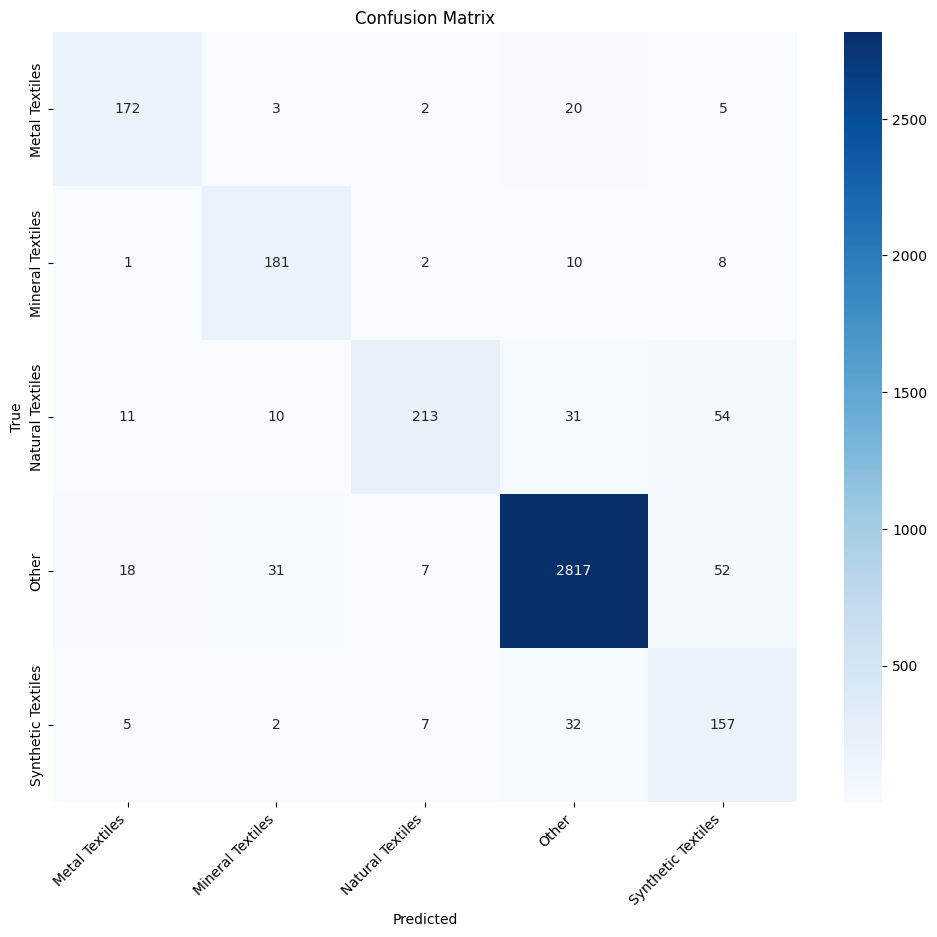

In [13]:
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_true, y_pred)
labels = sorted(y_true.unique())

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

## 5. Confidence Analysis

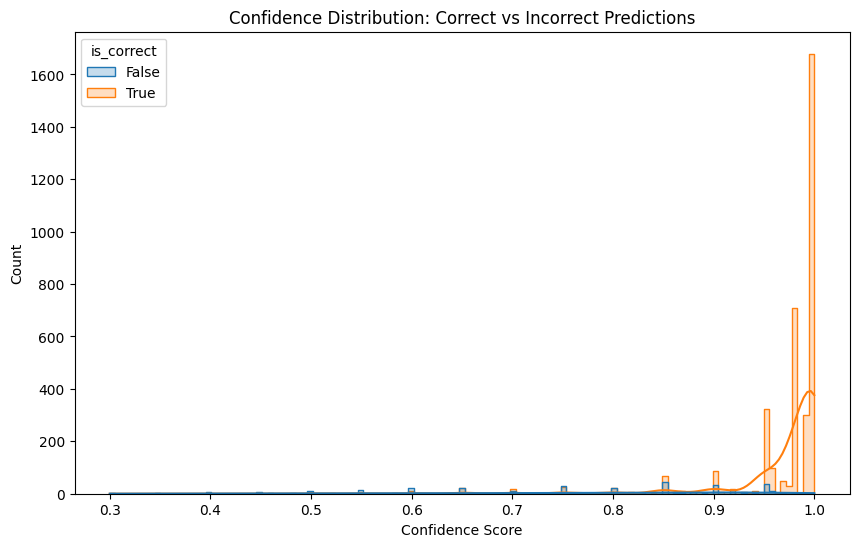

Average Confidence:
is_correct
False    0.776334
True     0.970652
Name: confidence_one, dtype: float64


In [14]:
df['is_correct'] = df['true_category'] == df['predicted_one']

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='confidence_one', hue='is_correct', element='step', common_norm=False, kde=True)
plt.title('Confidence Distribution: Correct vs Incorrect Predictions')
plt.xlabel('Confidence Score')
plt.ylabel('Count')
plt.show()

print("Average Confidence:")
print(df.groupby('is_correct')['confidence_one'].mean())

## 6. Error Analysis: High Confidence Errors

In [15]:
errors = df[~df['is_correct']].sort_values(by='confidence_one', ascending=False)
print("Top 10 High Confidence Errors:")
errors[['Title', 'true_category', 'predicted_one', 'confidence_one']].head(10)

Top 10 High Confidence Errors:


,Title,true_category,predicted_one,confidence_one
721,ELEVATOR CAR ISOLATION SYSTEM AND METHOD,Synthetic Textiles,Other,1.00
457,Preparation method of rabbit manure forage,Natural Textiles,Other,1.00
490,METHOD FOR MANUFACTURING BEADS CONTAINING EXOG...,Natural Textiles,Other,1.00
720,HOUSING HAVING LAYERED TEXTILE/RESIN STRUCTURE...,Synthetic Textiles,Other,1.00
2905,SHORT METAL FIBERS,Other,Metal Textiles,0.99
251,Improvements in or relating to the sizing of v...,Natural Textiles,Synthetic Textiles,0.98
3101,Structure for use in seawater comprising a cop...,Other,Metal Textiles,0.98
2930,A TEST DEVICE FOR A POROUS LOADS STERILIZER,Other,Synthetic Textiles,0.98
283,Non-static acetate fiber textile line with uni...,Natural Textiles,Synthetic Textiles,0.97
2187,SPCVD SILICATE GLASSES,Other,Mineral Textiles,0.97
